### C. Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association rules you can extract from your dataset? (0.5 point) (see http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)


In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

DATA_FILE = "Grocery_Items_61.csv"
MIN_SUPPORT_THRESHOLD = 0.01
MIN_CONFIDENCE_THRESHOLD = 0.1

def load_preprocess_data(file_path):
    raw_data = pd.read_csv(file_path)
    processed_data = raw_data.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
    return processed_data

def encode_transaction_data(processed_data):
    encoder = TransactionEncoder()
    encoded_array = encoder.fit(processed_data).transform(processed_data)
    onehot_encoded_dataframe = pd.DataFrame(encoded_array, columns=encoder.columns_)
    return onehot_encoded_dataframe

def find_itemsets_with_min_support(onehot_encoded_df, support_threshold):
    frequent_itemsets = apriori(onehot_encoded_df, min_support=support_threshold, use_colnames=True)
    return frequent_itemsets

def derive_association_rules(frequent_itemsets, confidence_threshold):
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_threshold)
    return rules

def perform_grocery_analysis(file_path, support_threshold, confidence_threshold):
    processed_data = load_preprocess_data(file_path)
    onehot_encoded_df = encode_transaction_data(processed_data)
    frequent_itemsets = find_itemsets_with_min_support(onehot_encoded_df, support_threshold)
    association_rules = derive_association_rules(frequent_itemsets, confidence_threshold)
    return onehot_encoded_df, frequent_itemsets, association_rules

encoded_df, itemsets, rules = perform_grocery_analysis(DATA_FILE, MIN_SUPPORT_THRESHOLD, MIN_CONFIDENCE_THRESHOLD)
print(encoded_df)
print(itemsets)
rules

      Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                     False     False             False             False   
1                     False     False             False             False   
2                     False     False             False             False   
3                     False     False             False             False   
4                     False     False             False             False   
...                     ...       ...               ...               ...   
7995                  False     False             False             False   
7996                  False     False             False             False   
7997                  False     False             False             False   
7998                  False     False             False             False   
7999                  False     False             False             False   

      baby cosmetics   bags  baking powder  bathroom cleaner   beef  berrie

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(other vegetables),0.155875,0.122500,0.015625,0.100241,0.818290,-0.003470,0.975261,-0.208275
1,(other vegetables),(whole milk),0.122500,0.155875,0.015625,0.127551,0.818290,-0.003470,0.967535,-0.201954
2,(rolls/buns),(whole milk),0.107625,0.155875,0.013500,0.125436,0.804719,-0.003276,0.965195,-0.213798
3,(soda),(whole milk),0.097375,0.155875,0.011250,0.115533,0.741188,-0.003928,0.954388,-0.278944
4,(yogurt),(whole milk),0.086250,0.155875,0.010125,0.117391,0.753112,-0.003319,0.956398,-0.264039


### what are the association rules you can extract from your dataset?
+ While whole milk turns up, the odds of having other vegetable items in the basket is 8.182%. 

+ When other vegetables are bought, there's an 8.182% chance that whole milk is also in the basket. 

+ Other products such as rolls or buns, as well as whole milk with probability of 8.041% will be imported too. 

+ Soda is bought with whole milk with a 7.411% likelihood.
  
+ Yogurt tends to be bought together with whole milk with a 7.531% chance.

### d. Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct): 0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from the dataset. Construct a heatmap using Seaborn data visualization library  (https://seaborn.pydata.org/generated/seaborn.heatmap.html) to show the count results such that the x-axis is msv and the y-axis is mct. (2.5 points)


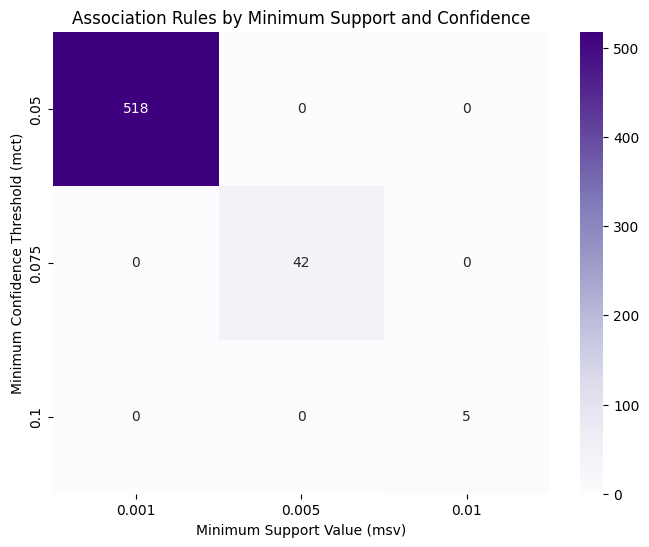

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

MIN_SUPPORT_VALUES = [0.001, 0.005, 0.01]
MIN_CONFIDENCE_VALUES = [0.05, 0.075, 0.1]
PAIRS = list(zip(MIN_SUPPORT_VALUES, MIN_CONFIDENCE_VALUES))

def generate_association_rules(transactions, pairs):
    rule_counts_matrix = np.zeros((len(pairs), len(pairs)))
    
    for idx, (support, confidence) in enumerate(pairs):
        frequent_itemsets = apriori(transactions, min_support=support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        rule_counts_matrix[idx, idx] = len(rules)
    
    return rule_counts_matrix

def plot_rules_heatmap(rule_counts, support_values, confidence_values):
    plt.figure(figsize=(8, 6))
    sns.heatmap(rule_counts, annot=True, fmt=".0f", cmap="Purples",
                xticklabels=support_values, yticklabels=confidence_values)
    plt.title("Association Rules by Minimum Support and Confidence")
    plt.xlabel("Minimum Support Value (msv)")
    plt.ylabel("Minimum Confidence Threshold (mct)")
    plt.show()

rule_counts_matrix = generate_association_rules(encoded_df, PAIRS)
plot_rules_heatmap(rule_counts_matrix, MIN_SUPPORT_VALUES, MIN_CONFIDENCE_VALUES)


### e. Split the dataset into 50:50 (i.e., 2 equal subsets) and extract association rules for each data subset for minimum support = 0.005 and minimum confident threshold = 0.075. Show the association rules for both sets. Which association rules appeared in both sets (note that there could be none)? (1 point)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


TEST_SPLIT_RATIO = 0.5
RANDOM_SEED = 40
MIN_SUPPORT_THRESHOLD = 0.005
MIN_CONFIDENCE_THRESHOLD = 0.075

def split_dataset(dataframe, test_ratio, seed):
    return train_test_split(dataframe, test_size=test_ratio, random_state=seed)

def find_association_rules(data, support, confidence):
    transaction_encoder = TransactionEncoder()
    data_encoded = transaction_encoder.fit(data).transform(data)
    df_encoded = pd.DataFrame(data_encoded, columns=transaction_encoder.columns_)
    frequent_itemsets = apriori(df_encoded, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
    return rules

def merge_rule_sets(rules1, rules2):
    return pd.merge(rules1, rules2, on=list(rules1.columns), how='outer')


data_set1, data_set2 = split_dataset(encoded_df, TEST_SPLIT_RATIO, RANDOM_SEED)

rules_set1 = find_association_rules(data_set1, MIN_SUPPORT_THRESHOLD, MIN_CONFIDENCE_THRESHOLD)
rules_set2 = find_association_rules(data_set2, MIN_SUPPORT_THRESHOLD, MIN_CONFIDENCE_THRESHOLD)

In [8]:
print("Rule set 1\n")
print(rules_set1)

print("Rule set 2\n")
print(rules_set2)

Rule set 1

     antecedents   consequents  antecedent support  consequent support  \
0            (a)           ( )             0.02575             0.02450   
1            ( )           (a)             0.02450             0.02575   
2            (b)           ( )             0.00975             0.02450   
3            ( )           (b)             0.02450             0.00975   
4            (c)           ( )             0.02000             0.02450   
...          ...           ...                 ...                 ...   
5259         (e)  (t, c, a, l)             0.02925             0.00550   
5260         (t)  (a, c, l, e)             0.01925             0.00650   
5261         (c)  (t, a, l, e)             0.02000             0.00625   
5262         (a)  (t, c, l, e)             0.02575             0.00550   
5263         (l)  (t, c, a, e)             0.01525             0.00625   

      support  confidence       lift  leverage  conviction  zhangs_metric  
0     0.01750    0.6796

In [9]:
combined_rules = merge_rule_sets(rules_set1, rules_set2)
combined_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(a),( ),0.02575,0.02450,0.01750,0.679612,27.739251,0.016869,3.044742,0.989428
1,(a),"(t, l, e)",0.02575,0.00750,0.00625,0.242718,32.362460,0.006057,1.310609,0.994714
2,(a),"(s, l, e)",0.02575,0.00775,0.00600,0.233010,30.065769,0.005800,1.293693,0.992291
3,(a),"(l, r, e)",0.02575,0.00775,0.00625,0.242718,31.318509,0.006050,1.310279,0.993657
4,(a),"(t, i, e)",0.02575,0.00725,0.00500,0.194175,26.782725,0.004813,1.231967,0.988106
...,...,...,...,...,...,...,...,...,...,...
5259,"(r, n)","( , i)",0.01150,0.01500,0.00600,0.521739,34.782609,0.005828,2.059545,0.982549
5260,"(r, n)","(s, , e)",0.01150,0.01325,0.00500,0.434783,32.813782,0.004848,1.745788,0.980804
5261,"(r, n)","( , i, e)",0.01150,0.01250,0.00525,0.456522,36.521739,0.005106,1.817000,0.983934
5262,"(r, n)","(a, , e)",0.01150,0.01400,0.00550,0.478261,34.161491,0.005339,1.889833,0.982021


### 2. [ImageClassification using CNN]Constructa4-class classification model using a convolutional neural network with the following simple architecture (2 point)
+ i 1Convolutional Layer with 8 3 × 3 filters.
+ ii 1 max pooling with 2 × 2 pool size
+ iii Flatten the Tensor
+ iv 1 hidden layer with 16 nodes for fully connected neural network
+ v Output layer has 4 nodes (since 4 classes) using ‘softmax’ activation function.

In [12]:
import numpy as np
from keras.utils import to_categorical
from PIL import Image
import os
from sklearn.model_selection import train_test_split

myDogBreeds = [
    "n02099712-Labrador_retriever",
    "n02110185-Siberian_husky",
    "n02113799-standard_poodle",
    "n02113186-Cardigan"
]

def get_images_base_directory():
    base_directory = os.getcwd()
    return os.path.join(base_directory, 'images')

def load_and_label_images(directory, breed_idx, target_img_size):
    images = []
    labels = []
    
    for image_filename in os.listdir(directory):
        full_image_path = os.path.join(directory, image_filename)
        with Image.open(full_image_path) as image:
            resized_image = image.convert('RGB').resize(target_img_size)
            images.append(np.array(resized_image))
            labels.append(breed_idx)
            
    return images, labels

def normalize_and_encode_images(images, labels, total_breeds):
    normalized_images = np.array(images, dtype=np.float32) / 255.0
    one_hot_encoded_labels = to_categorical(labels, num_classes=total_breeds)
    
    return normalized_images, one_hot_encoded_labels

def create_image_dataset(breeds, directory, img_size):
    dataset_images = []
    dataset_labels = []
    
    for idx, breed in enumerate(breeds):
        breed_path = os.path.join(directory, breed)
        if breed in os.listdir(directory):
            images, labels = load_and_label_images(breed_path, idx, img_size)
            dataset_images.extend(images)
            dataset_labels.extend(labels)
    
    return normalize_and_encode_images(dataset_images, dataset_labels, len(breeds))

images_directory = get_images_base_directory()
target_image_size = (128, 128)
final_dataset, final_labels = create_image_dataset(myDogBreeds, images_directory, target_image_size)

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(final_dataset, final_labels, test_size=0.20, random_state=40)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2203 - loss: 1.4757 - val_accuracy: 0.2132 - val_loss: 1.3864
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2187 - loss: 1.3864 - val_accuracy: 0.2794 - val_loss: 1.3859
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2756 - loss: 1.3858 - val_accuracy: 0.2794 - val_loss: 1.3856
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2679 - loss: 1.3857 - val_accuracy: 0.2794 - val_loss: 1.3853
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2922 - loss: 1.3850 - val_accuracy: 0.2794 - val_loss: 1.3849
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2808 - loss: 1.3849 - val_accuracy: 0.2794 - val_loss: 1.3847
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2946 - loss: 1.3837 - val_accuracy: 0.2574 - val_loss: 1.3988
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2662 - loss: 1.3820 - val_accuracy: 0.2868 - v

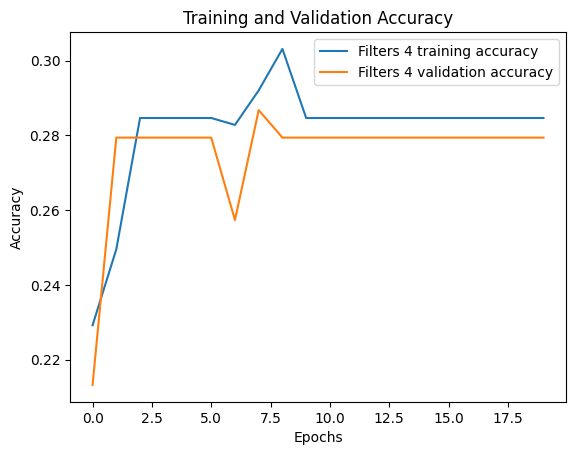

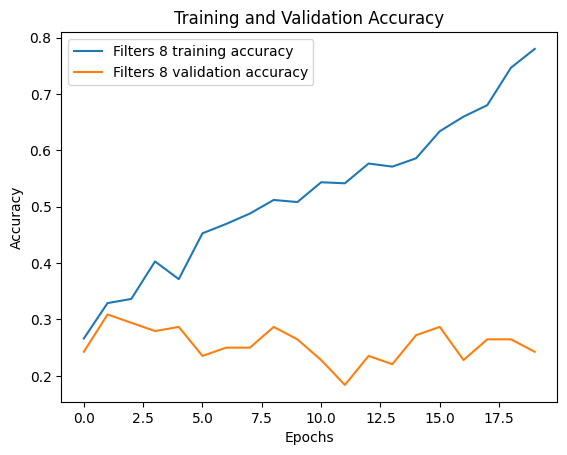

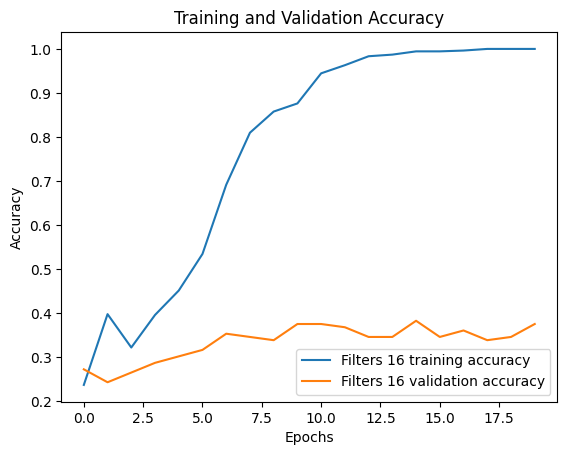

In [21]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split

def create_and_train_cnn(num_filters, kernel_size, input_shape, num_classes, X_train, y_train, X_val, y_val, epochs, batch_size):
    model = Sequential([
        Conv2D(num_filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(16, activation='relu'), 
        Dense(num_classes, activation='softmax') 
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
    return history


def plot_learning_curves(histories, num_epochs):
    for label, history in histories.items():
        plt.plot(history.history['accuracy'], label=f'{label} training accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{label} validation accuracy')

        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()


input_shape = (128, 128, 3)
num_classes = 4  
epochs = 20
batch_size = 32 

filters_options = [4, 8, 16]
histories = {}

for num_filters in filters_options:
    histories[f'Filters {num_filters}'] = create_and_train_cnn(
        num_filters, (3, 3), input_shape, num_classes, X_train, y_train, X_val, y_val, epochs, batch_size
    )

plot_learning_curves(histories, epochs)

#### Describe and discuss what you observe by comparing the performance of the first model and the other two models you constructed in (a), (b) or (c) (depending on which one you did). Are there model overfit or underfit or just right?

##### Model with 4 Filters:
+ This model shows the lowest accuracy among the three, both in training and validation.
+ The proximity between the rates of training and validation accuracy show that the model does not tend to overfit; but the reverse, if it is underfitting.
+ Underfitting is characterized by a model that is too simple to capture the underlying structure of the data. This model likely lacks the capacity to learn the features necessary for a higher accuracy.

##### Model with 8 Filters:
+ There is an improvement in training accuracy compared to the model with 4 filters, indicating that increasing the capacity of the model helps in learning from the training data.
+ Though the validation accuracy might go up, it might not grow at the same speed as the training mistakes are.This gap suggests the model may be starting to overfit, as it's learning features that are not generalizing well to the validation set.
+ Learning specific to the training data is when the model generalizes the patterns seen there which are not present in the new data that the model has not seen before is called overfitting.

##### Model with 16 Filters:
+ The model that has 16 filters has a considerable rise in the training accuracy to approach optimum levels, but this gap is quite notable as you get to the validation accuracy.

+ The high training accuracy paired with the lower validation accuracy is a classic sign of overfitting. The model may have moved beyond the training data to a level where it inadvertently memorizes the noise and details that are not representative of the main trends in the data.